In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

class TrailClusterer:
    
    def __init__(self, data_file):
        self.data_file = data_file
        
    def cluster_trails(self):
        data_K = pd.read_csv(self.data_file)
        data_K['type_factor']= data_K['type_factor'].map({0:'easy', 0.1:'medium', 0.3:'hard'})
        data_K=data_K.loc[(data_K['Shape_Leng']>50)]
        X = data_K[['Shape_Leng', 'Elevation_Gain', 'Angle_of_Descent', 'type_factor']]
        
        # Create a ColumnTransformer to apply OneHotEncoder to the first column only
        ct = ColumnTransformer([
            ('onehot', OneHotEncoder(), ['type_factor']),  # Apply OneHotEncoder to the first column
            ('scaling', MinMaxScaler(), ['Shape_Leng', 'Elevation_Gain','Angle_of_Descent'])
        ]) 

        # Apply the ColumnTransformer to your input data
        transformed_data = ct.fit_transform(X)

        silohoutte = []
        for i in range(2,11):
            # Add AgglomerativeClustering to the pipeline
            clusterer = AgglomerativeClustering(n_clusters=i, linkage='average', metric='euclidean')
            cluster_labels = clusterer.fit_predict(transformed_data)

            # Compute the silhouette score
            silhouette_avg = silhouette_score(transformed_data, cluster_labels)
            silohoutte.append(silhouette_avg)

        plt.plot(range(2,11), silohoutte, marker='o')
        plt.xlabel('Number of clusters')
        plt.ylabel('Silhoutte Score')
        plt.show()

        # Add AgglomerativeClustering to the pipeline
        clusterer = AgglomerativeClustering(n_clusters=6, linkage='average', metric='manhattan')
        cluster_labels = clusterer.fit_predict(transformed_data)

        data_K['Cluster']=cluster_labels
        # Compute the silhouette score
        silhouette_avg = silhouette_score(transformed_data, cluster_labels)

        print("The average silhouette score is :", silhouette_avg)
        # Plot the clusters
        sns.scatterplot(data=data_K, x='type_factor', y='Elevation_Gain', hue='Cluster', palette = 'Reds')
        plt.xlabel('Type of Trail')
        plt.ylabel('Elevation Gain')
        plt.show()
        return data_K
   

In [36]:
trail = TrailClusterer('Finalized_Trail_paths.csv')

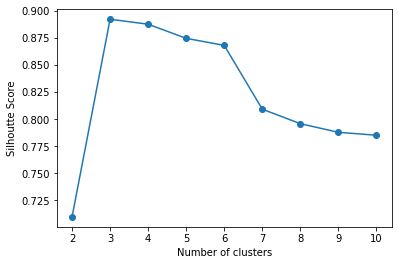

The average silhouette score is : 0.8088290985483415


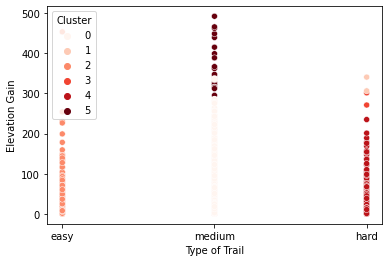

In [37]:
data=trail.cluster_trails()

In [38]:
data.loc[(data['type_factor'] == 'hard') & (data['Cluster'] != 4) & (data['Cluster'] != 3) & (data['Elevation_Gain'] >100)]

,Unit,site_name,latitude,longitude,address,phone,website,description,amenities,Name,...,Foot,Horse,Bike,Snowmb,Accessible,Shape_Leng,Elevation_Gain,Angle_of_Descent,DR,Cluster
1615,Taconic,Hudson Highlands State Park Preserve,41.441181,-73.975471,"3011 Route 9DCold Spring, NY 10516",(845) 265-3175,https://parks.ny.gov/parks/9,Know Before You Go...More InfoPet PolicyA maxi...,"Hiking, Hunting",Unnamed,...,Y,N,N,N,N,2506.441844,340.442000,7.734967,1.428262,1
1744,Taconic,Taconic State Park - Copake Falls Area,42.120987,-73.519562,"253 Route 344Copake Falls, NY 12517",(518) 329-3993,https://parks.ny.gov/parks/83,Know Before You Go...More InfoPet PolicyA maxi...,"Camper Assistance Program, Campsites, Cabins &...",Missing Trail Name,...,Y,N,N,N,N,546.828040,306.237762,29.249948,1.013145,1


In [39]:
mapping = {0:'Easy', 1: 'Extreme', 2:'Very Easy', 3: 'Very Hard', 4: 'Hard', 5: 'Medium'}
data['Difficulty']=data['Cluster'].map(mapping)

In [40]:
data

,Unit,site_name,latitude,longitude,address,phone,website,description,amenities,Name,...,Horse,Bike,Snowmb,Accessible,Shape_Leng,Elevation_Gain,Angle_of_Descent,DR,Cluster,Difficulty
0,Allegany,Allegany State Park - Quaker Area,42.038990,-78.843833,"2373 ASP, Rte 1Salamanca, NY 14779",(716) 354-2182,https://parks.ny.gov/parks/1,The Quaker area is known for its two lakes and...,"Boat Launches, Camper Assistance Program, Camp...",ASP 1,...,Y,N,Y,N,2762.553239,38.980042,0.808398,0.777134,2,Very Easy
1,Allegany,Allegany State Park - Quaker Area,42.038990,-78.843833,"2373 ASP, Rte 1Salamanca, NY 14779",(716) 354-2182,https://parks.ny.gov/parks/1,The Quaker area is known for its two lakes and...,"Boat Launches, Camper Assistance Program, Camp...",ASP1,...,N,Y,Y,N,11247.667588,230.279968,1.172886,1.451551,2,Very Easy
2,Allegany,Allegany State Park - Quaker Area,42.038990,-78.843833,"2373 ASP, Rte 1Salamanca, NY 14779",(716) 354-2182,https://parks.ny.gov/parks/1,The Quaker area is known for its two lakes and...,"Boat Launches, Camper Assistance Program, Camp...",Bay State Rd,...,Y,N,N,N,1599.398857,18.770050,0.672375,0.507771,2,Very Easy
3,Allegany,Allegany State Park - Quaker Area,42.038990,-78.843833,"2373 ASP, Rte 1Salamanca, NY 14779",(716) 354-2182,https://parks.ny.gov/parks/1,The Quaker area is known for its two lakes and...,"Boat Launches, Camper Assistance Program, Camp...",Bay State Rd,...,Y,N,Y,N,722.157056,20.960052,1.662499,0.319747,2,Very Easy
4,Allegany,Allegany State Park - Quaker Area,42.038990,-78.843833,"2373 ASP, Rte 1Salamanca, NY 14779",(716) 354-2182,https://parks.ny.gov/parks/1,The Quaker area is known for its two lakes and...,"Boat Launches, Camper Assistance Program, Camp...",Bay State Rd,...,Y,N,Y,N,5830.772003,253.869904,2.493065,1.297291,2,Very Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,Thousand Islands,Whetstone Gulf State Park,43.702629,-75.459938,"6065 West Rd.Lowville, NY 13367",(315) 376-6630,https://parks.ny.gov/parks/92,Know Before You Go...More InfoPet PolicyA maxi...,"Fishing, Grills, Hiking, Hunting, Pavilions an...",North Rim Gorge Tail,...,N,N,N,N,3378.218496,65.474701,1.110335,1.019653,0,Easy
1878,Thousand Islands,Whetstone Gulf State Park,43.702629,-75.459938,"6065 West Rd.Lowville, NY 13367",(315) 376-6630,https://parks.ny.gov/parks/92,Know Before You Go...More InfoPet PolicyA maxi...,"Fishing, Grills, Hiking, Hunting, Pavilions an...",North Rim Gorge Tail,...,N,N,Y,N,1032.669680,94.932037,5.252367,0.775353,0,Easy
1879,Thousand Islands,Whetstone Gulf State Park,43.702629,-75.459938,"6065 West Rd.Lowville, NY 13367",(315) 376-6630,https://parks.ny.gov/parks/92,Know Before You Go...More InfoPet PolicyA maxi...,"Fishing, Grills, Hiking, Hunting, Pavilions an...",Observation Tower Trail,...,N,N,N,N,273.318398,50.888458,10.546989,0.320660,0,Easy
1880,Thousand Islands,Whetstone Gulf State Park,43.702629,-75.459938,"6065 West Rd.Lowville, NY 13367",(315) 376-6630,https://parks.ny.gov/parks/92,Know Before You Go...More InfoPet PolicyA maxi...,"Fishing, Grills, Hiking, Hunting, Pavilions an...",South Rim Gorge Trail,...,N,N,N,N,4268.759962,161.962860,2.172842,1.237958,0,Easy


In [41]:
data.to_csv('Trail_Difficulty.csv', index=False)